# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [162]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mouse_study= pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")


# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [77]:
# Checking the number of mice.
number_mice=mouse_study["Mouse ID"].nunique()
print(number_mice)

249


In [78]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate= mouse_study["Mouse ID"][mouse_study.duplicated(["Mouse ID","Timepoint"])]
A=duplicate.unique()
print(A)


['g989']


In [79]:
# Optional: Get all the data for the duplicate mouse ID. 
a= mouse_study[mouse_study["Mouse ID"]=="g989"]
a


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [80]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_study.drop(mouse_study[(mouse_study["Mouse ID"]=="g989")].index, inplace=True)
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean=mouse_study["Mouse ID"].nunique()
print(number_mice_clean)

248


## Summary Statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor= mouse_study.groupby (["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor=mouse_study.groupby (["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance=mouse_study.groupby (["Drug Regimen"])["Tumor Volume (mm3)"].var()
std=mouse_study.groupby (["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem=mouse_study.groupby (["Drug Regimen"])["Tumor Volume (mm3)"].sem()


a = pd.merge(mean_tumor, median_tumor, how="left",on="Drug Regimen")
b=pd.merge(variance,std,how="left",on="Drug Regimen")
c=pd.merge(a,b,how="left",on="Drug Regimen")
d=pd.merge(c,sem,how="left", on="Drug Regimen")


drug_summary=d.rename(columns={
     "Tumor Volume (mm3)_x_x": "Mean Tumor Volume",
    "Tumor Volume (mm3)_y_x": "Median Tumor Volume",
    "Tumor Volume (mm3)_x_y": "Tumor Volume Variance",
    "Tumor Volume (mm3)_y_y": "Tumor Volume Std. Dev.",
    "Tumor Volume (mm3)": "Tumor Volume Std. Err"
})

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [83]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [84]:
summary= mouse_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median", "var", "std","std","sem"])
summary

,mean,median,var,std,std,sem
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,7.710419,0.573111


## Bar and Pie Charts

In [85]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

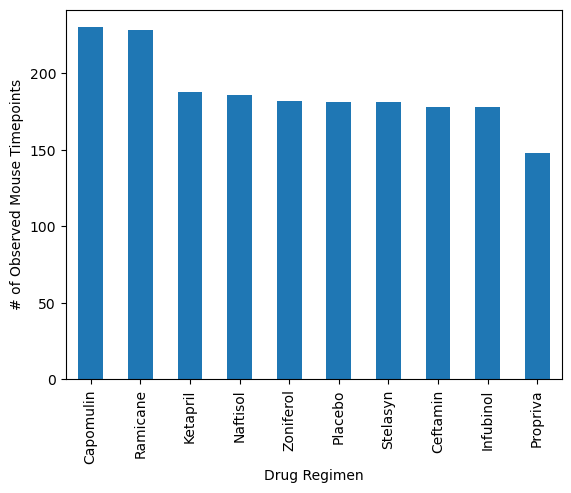

In [86]:
total_num_rows= mouse_study.groupby(["Drug Regimen"])["Timepoint"].count()
total_num_rows1= total_num_rows.sort_values(ascending=False)
total_num_rows1.plot(kind="bar")


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

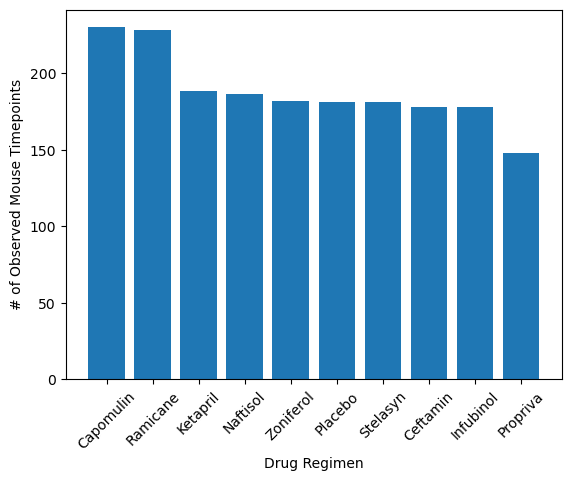

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug_regimens=total_num_rows1.index

observed_timepoints=total_num_rows1.values


plt.bar(drug_regimens, observed_timepoints)


plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

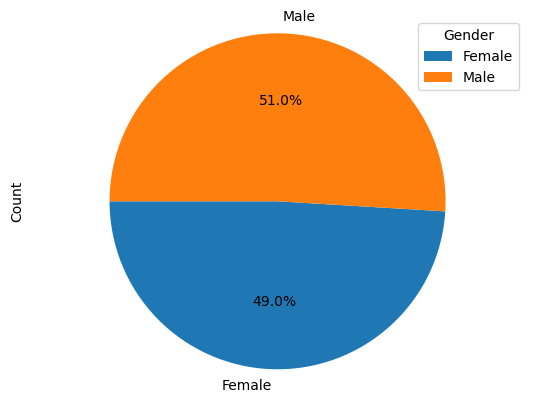

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender= mouse_study.groupby(["Mouse ID"])["Sex"].value_counts()
female_gender_count=gender.loc[:, "Female"].sum()
male_gender_count=gender.loc[:, "Male"].sum()

gender_data=[female_gender_count,male_gender_count]
gender_counts=pd.DataFrame(gender_data, index=["Female","Male"], columns=["Count"])
gender_counts.plot(kind="pie", y="Count", autopct="%1.1f%%", startangle=180)
plt.axis("equal")
plt.legend(gender_counts.index, title="Gender", loc="upper right")
plt.show()

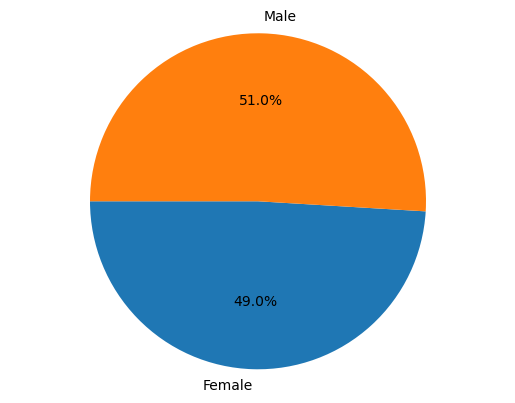

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_labels=["Female","Male"]
plt.pie(gender_data, labels=gender_labels, autopct="%1.1f%%", startangle=180)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [95]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= mouse_study.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tumor=pd.merge(max_timepoint, mouse_study, on="Mouse ID", how="left")
#max_tumor["Timepoint_x"]==max_tumor["Timepoint_y"].max()

final_max_tumor=max_tumor[max_tumor["Timepoint_x"]==max_tumor["Timepoint_y"].max()]

treatment_regimens=["Capomulin", "Ramicane","Infubinol", "Ceftamin"]
final_tumor_volume=final_max_tumor[final_max_tumor["Drug Regimen"].isin(treatment_regimens)]

a=final_tumor_volume.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
a



Drug Regimen
Capomulin    40.570499
Ceftamin     53.771982
Infubinol    55.079630
Ramicane     39.757189
Name: Tumor Volume (mm3), dtype: float64

In [113]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_regimens=["Capomulin", "Ramicane","Infubinol", "Ceftamin"]

#Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimens:
    tumor_vol=mouse_study.loc[mouse_study["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)
    
quartiles=tumor_vol.quantile([0.25, 0.75])
lower_quartile=quartiles[0.25]
upper_quartile=quartiles[0.75]
iqr=upper_quartile-lower_quartile

lower_bound=lower_quartile-1.5*iqr
upper_bound=upper_quartile+1.5*iqr
    
    # Determine outliers using upper and lower bounds
outliers= tumor_vol.loc[(tumor_vol<lower_bound)|(tumor_vol>upper_bound)]


# print(f"{treatment}'s potential outliers:", end=" ")
# if outliers.empty:
#     print("None")
# else:
#     print(outliers)
    

Series([], Name: Tumor Volume (mm3), dtype: float64)

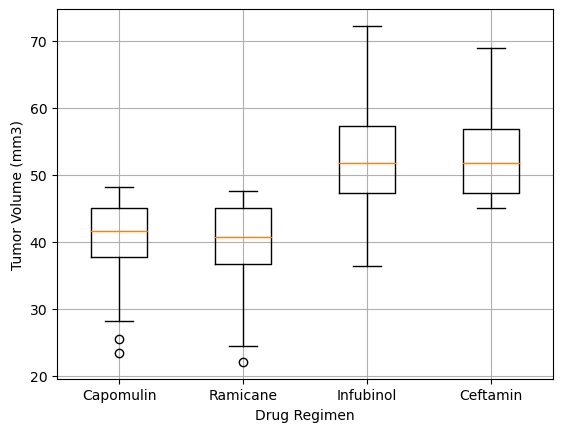

In [108]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatment_regimens)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
plt.show()

## Line and Scatter Plots

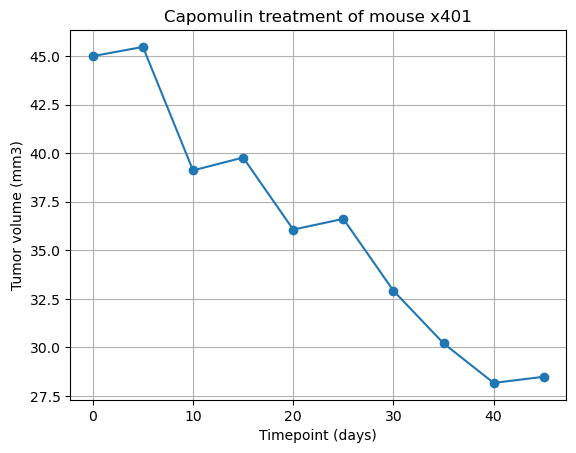

In [112]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id= "x401"
selected_mouse=mouse_study[(mouse_study["Mouse ID"]==mouse_id)&(mouse_study["Drug Regimen"]=="Capomulin")]
plt.plot(selected_mouse["Timepoint"], selected_mouse["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor volume (mm3)")
plt.title("Capomulin treatment of mouse x401")
plt.grid(True)
plt.show()

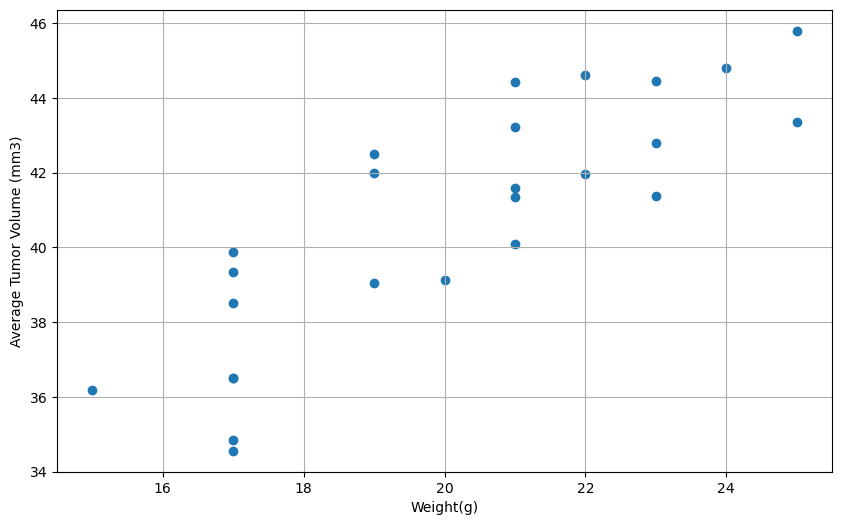

In [160]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data=mouse_study[mouse_study["Drug Regimen"]=="Capomulin"]

avg_tumor_vol=capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()



a= capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

b=pd.merge(avg_tumor_vol, a, on="Mouse ID", how="inner")


plt.figure(figsize=(10,6))
plt.scatter(b["Weight (g)"], b["Tumor Volume (mm3)"], marker="o")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8343958614425963


NameError: name 'slope' is not defined

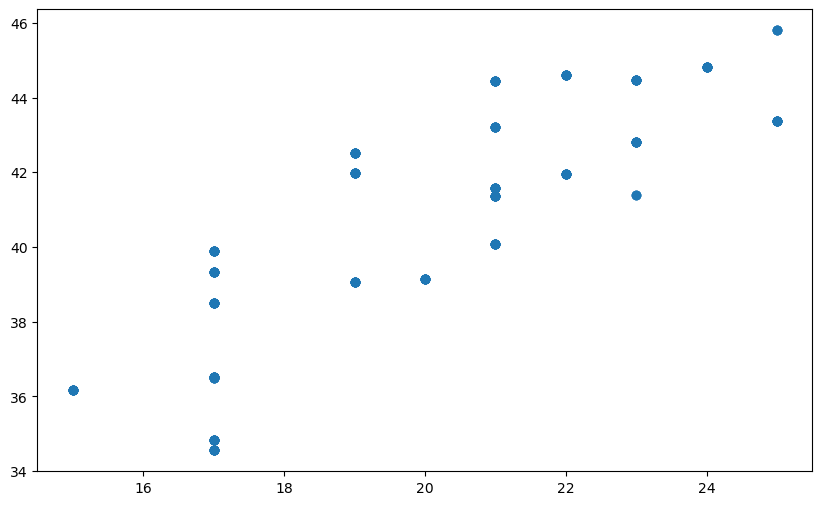

In [166]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


correlation_coefficient = stats.pearsonr(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"])[0]
print("Correlation Coefficient:", correlation_coefficient)

# X = sm.add_constant(merged_data["Weight (g)"])  # Adding a constant for the intercept term
# Y = merged_data["Tumor Volume (mm3)"]
# model = sm.OLS(Y, X).fit()

# slope = model.params[1]
# intercept = model.params[0]

# regression_equation = f"y = {slope:.2f}x + {intercept:.2f}"

# plt.figure(figsize=(10, 6))
# plt.scatter(merged_data["Weight (g)"], merged_data["Tumor Volume (mm3)"], marker="o", label="Data Points")
# plt.plot(merged_data["Weight (g)"], slope * merged_data["Weight (g)"] + intercept, color="red", label="Regression Line")
# plt.xlabel("Weight(g)")
# plt.ylabel("Average Tumor Volume (mm3)")
# plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
# plt.grid(True)
# plt.legend()
# plt.show()

# print("Regression Equation:", regression_equation)
